<a href="https://colab.research.google.com/github/pthkbs123/SkillTreePython-DeepLearning/blob/main/03.NLP-with-tensorflow2.0/ch03_01_NLP%EA%B8%B0%EC%B4%88_%ED%85%8D%EC%8A%A4%ED%8A%B8%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch03.01 NLP기초 - 텍스트 처리
---

* 날짜: 2022-07-13
* 이름: 박태현

## 학습내용
    - 텍스트 전처리 과정을 이해한다.
      - 텍스트 토큰화
      - 텍스트 인덱싱
      - 원-핫 인코딩
      - 텍스트 임베딩
    - 간단한 문장을 분류하는 딥러닝 모델을 구현한다.


```
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning
```

In [1]:
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning

Cloning into 'SkillTreePython-DeepLearning'...
remote: Enumerating objects: 665, done.
remote: Counting objects: 100% (238/238), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 665 (delta 145), reused 188 (delta 124), pack-reused 427
Receiving objects: 100% (665/665), 37.09 MiB | 23.21 MiB/s, done.
Resolving deltas: 100% (338/338), done.


```
import sys
sys.path.append('/content/SkillTreePython-DeepLearning/02.케라스_창시자에게_배우는_딥러닝/scripts')
from import_lib import *
```

In [2]:
import sys
sys.path.append('/content/SkillTreePython-DeepLearning/02.케라스_창시자에게_배우는_딥러닝/scripts')
from import_lib import *

## 텍스트 데이터 처리
---

### **| 전처리 구현하기**

#### **딕셔너리 제작**

In [ ]:
# 1. 토큰화
# 2. 단어 인덱싱
# 모든 토큰에 대해 숫자로 매핑
# 인덱싱을 위핸선 딕셔너리 필요

In [9]:
samples = ['very nice movie',
           'this movie is bad',
           'it is so bad',
           'wow it is a good movie']
word_dict = {}
for sample in samples:
  print(sample)
  for token in sample.split(' '):
    # print(token)
    if token not in word_dict:
      word_dict[token] = len(word_dict) + 1
print(word_dict)
print('모든 단어 개수 :', len(word_dict))

very nice movie
this movie is bad
it is so bad
wow it is a good movie
{'very': 1, 'nice': 2, 'movie': 3, 'this': 4, 'is': 5, 'bad': 6, 'it': 7, 'so': 8, 'wow': 9, 'a': 10, 'good': 11}
모든 단어 개수 : 11


클래스가 3개 일 때,

1 : 1 0 0

2 : 0 1 0

3 : 0 0 1

클래스 개수가 단어 개수만큼 ( 5000개 단어 ~ 10000개 단어)

1 : 1 0 0 ... 0

2 : ...

5000 : 0 ... 1

#### **단어 인덱싱**

In [10]:
def word_indexing(sample, word_dict):
  indexed = []
  for token in sample.split(' '):
    num = word_dict[token]
    indexed.append(num)
    
  return np.array(indexed)

In [12]:
word_indexing(samples[2], word_dict)

array([7, 5, 8, 6])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

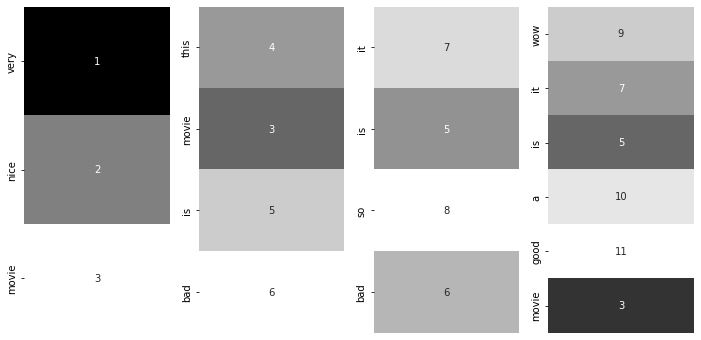

In [21]:
plt.figure(figsize = (len(samples) * 3, 6))
for i, sample in enumerate(samples):
  indexed = word_indexing(sample, word_dict)
  plt.subplot(1, len(samples), i+1)
  sns.heatmap(indexed.reshape(len(indexed), 1), 1, cmap = 'gray', 
              annot = True, cbar = False, 
              yticklabels = sample.split(' '),
              xticklabels = [])
plt.show

#### **원-핫 인코딩**

In [34]:
# sample_mxlen : 한 문장안에 몇 개의 토큰까지 허락할지
# total_word : 딕셔너리 안에 있는 모든 단어의 수
def word_onehot(sample, sample_mxlen, total_words):
  onehot = np.zeros((sample_mxlen, total_words + 1)) # 단어 인덱스 1~11, 파이썬 인덱스 0~11 총 12개
  for i, token in enumerate(sample.split(' ')):
    if i == sample_mxlen : break # 샘플이 너무 길면 자르기
    index = word_dict[token] # 토큰이 몇 번째 해당하는지 반환
    onehot[i, index] = 1 # i 번째 토큰, index 해당하는 자리에 1 할당
  return onehot

idx = 3
print(samples[idx])
print(word_indexing(samples[idx], word_dict))
print(word_onehot(samples[idx], 5, len(word_dict)))

wow it is a good movie
[ 9  7  5 10 11  3]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


<function matplotlib.pyplot.show>

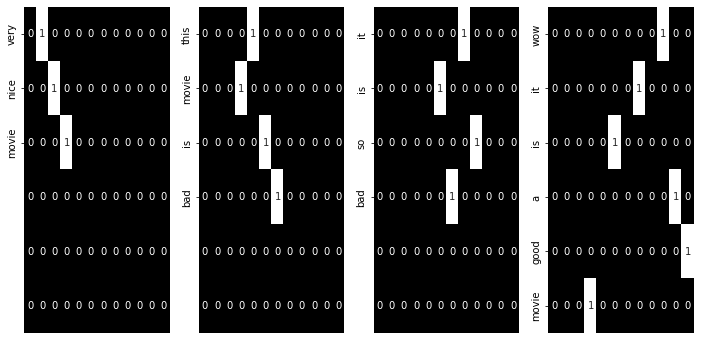

In [37]:
plt.figure(figsize = (len(samples) * 3, 6))
for i, sample in enumerate(samples):
  onehot = word_onehot(samples[i], 6, len(word_dict))
  plt.subplot(1, len(samples), i+1)
  sns.heatmap(onehot, cmap = 'gray', 
              annot = True, cbar = False, 
              yticklabels = sample.split(' '),
              xticklabels = [])
plt.show

### | **텐서플로우 케라스 Tokenizer**


In [38]:
from tensorflow.keras.preprocessing.text import Tokenizer
tk = Tokenizer()
tk.fit_on_texts(samples)

In [41]:
print('생성된 딕셔너리 :', tk.word_index)
print('단어 카운트 :', tk.word_counts) 
print('단어 하나가 몇 개의 문장에 포함되어 있는가 :', tk.word_docs)
print('문장(샘플) 카운트 :', tk.document_count)

생성된 딕셔너리 : {'movie': 1, 'is': 2, 'bad': 3, 'it': 4, 'very': 5, 'nice': 6, 'this': 7, 'so': 8, 'wow': 9, 'a': 10, 'good': 11}
단어 카운트 : OrderedDict([('very', 1), ('nice', 1), ('movie', 3), ('this', 1), ('is', 3), ('bad', 2), ('it', 2), ('so', 1), ('wow', 1), ('a', 1), ('good', 1)])
단어 하나가 몇 개의 문장에 포함되어 있는가 : defaultdict(<class 'int'>, {'very': 1, 'nice': 1, 'movie': 3, 'bad': 2, 'is': 3, 'this': 1, 'so': 1, 'it': 2, 'wow': 1, 'a': 1, 'good': 1})
문장(샘플) 카운트 : 4


#### **단어 인덱싱**

In [43]:
seqs = tk.texts_to_sequences(samples)
print('단어 인덱싱 결과 :', seqs)

단어 인덱싱 결과 : [[5, 6, 1], [7, 1, 2, 3], [4, 2, 8, 3], [9, 4, 2, 10, 11, 1]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

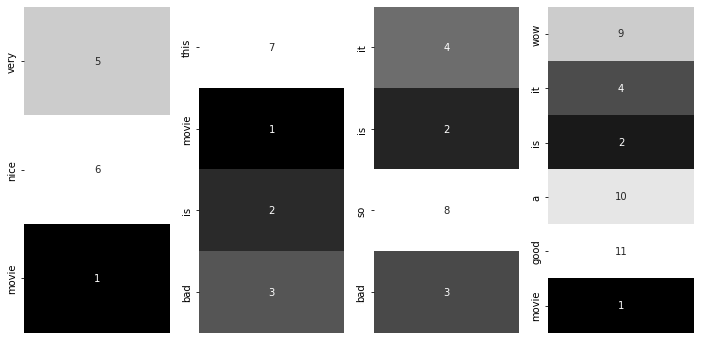

In [45]:
plt.figure(figsize = (len(samples) * 3, 6))
for i, sample in enumerate(samples):
  indexed = np.array(seqs[i])
  plt.subplot(1, len(samples), i+1)
  sns.heatmap(indexed.reshape(len(indexed), 1), 1, cmap = 'gray', 
              annot = True, cbar = False, 
              yticklabels = sample.split(' '),
              xticklabels = [])
plt.show

#### **패딩**

In [46]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

pads = pad_sequences(seqs, 6)
print('패딩 결과 :\n', pads, pads.shape) # 앞 쪽에 패딩을 한다

패딩 결과 :
 [[ 0  0  0  5  6  1]
 [ 0  0  7  1  2  3]
 [ 0  0  4  2  8  3]
 [ 9  4  2 10 11  1]] (4, 6)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

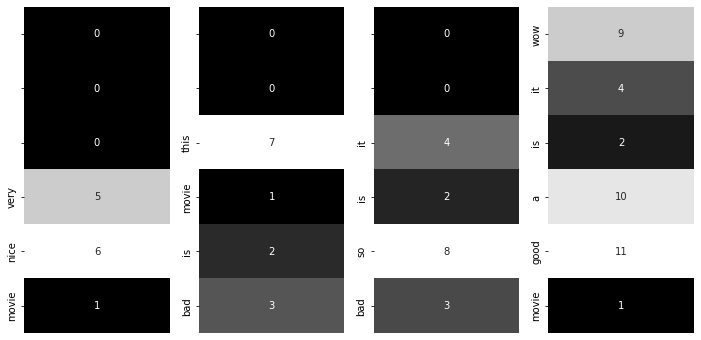

In [63]:
plt.figure(figsize = (len(samples) * 3, 6))
for i, sample in enumerate(samples):
  plt.subplot(1, len(samples), i+1)
  sns.heatmap(pads[i].reshape(len(indexed), 1), 1, cmap = 'gray', 
              annot = True, cbar = False, 
              yticklabels = ['']*(6-len(sample.split(' ')))+sample.split(' '),
              xticklabels = [])
plt.show

#### **원핫 인코딩**

In [50]:
len(word_dict)

11

In [61]:
# 인풋 시퀀스는 길이가 동일해야 함
onehots = utils.to_categorical(pads, num_classes=len(word_dict)+1) # 단어 개수 + 1
# 단어가 없거나 / 딕셔너리에 존재하지 않는 단어는 첫 번째 클래스에 할당하기 위해서
print(onehots.shape)

(4, 6, 12)


<function matplotlib.pyplot.show>

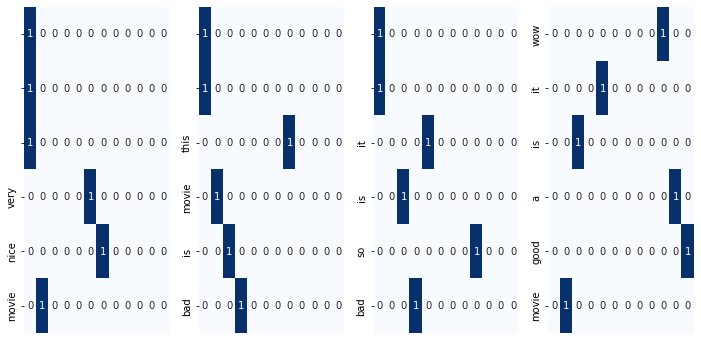

In [62]:
plt.figure(figsize = (len(samples) * 3, 6))
for i, sample in enumerate(samples):
  plt.subplot(1, len(samples), i+1)
  sns.heatmap(onehots[i], cmap = 'Blues', 
              annot = True, cbar = False, 
              yticklabels = ['']*(6-len(sample.split(' ')))+sample.split(' '),
              xticklabels = [])
plt.show

In [ ]:
# 원 핫 인코딩 결과
# 행 : padding 개수 - 샘플 하나의 최대 단어 개수
# 열 : 단어 하나가 몇 개의 디멘션으로 표현될 수 있는가

#### **단어 임베딩**

In [65]:
# 단어 하나가 표현할 수 있는 디멘션이 자유롭다
# 원 핫 인코딩 처럼 단어 하나를 딕셔너리에 있는단어 수의 크기만큼의 디멘션으로 표현 하지 않아도 됨
# 1: word 2 : hello 3 : any
# my 1 0 0 0
# word 0 1 0 0

In [84]:
# 인풋 : 패딩된 seqences
# 최대 길이 + 1 -> 처음 시작을 비워놓기 때문에
embedding_layer = layers.Embedding(input_dim = 6 + 1, output_dim = 3) # 원 핫 처리후 임베딩
# 학습이 필요

In [85]:
embeded = embedding_layer(pads[0])
embeded.shape

TensorShape([6, 3])

<function matplotlib.pyplot.show>

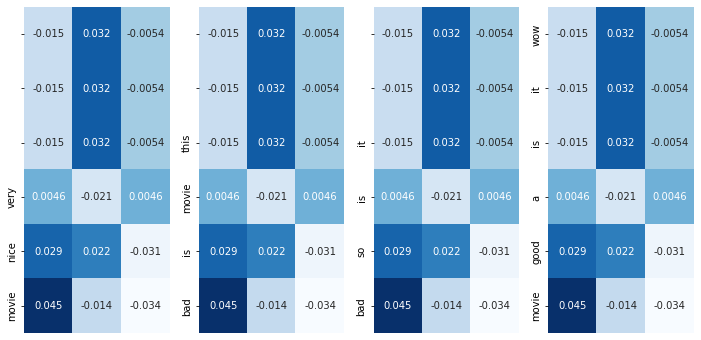

In [86]:
plt.figure(figsize = (len(samples) * 3, 6))
for i, sample in enumerate(samples):
  embeded = embedding_layer(pads[0])
  plt.subplot(1, len(samples), i+1)
  sns.heatmap(embeded, cmap = 'Blues', 
              annot = True, cbar = False, 
              yticklabels = ['']*(6-len(sample.split(' ')))+sample.split(' '),
              xticklabels = [])
plt.show
# 학습되지 않아 랜덤한 값이 도출됨.

## 간단 예제
---

### | **텍스트 전처리**

In [96]:
docs = ["너무 재미 있네요",
        "최고 예요",
        "참 잘 만든 영화 예요",
        "추천 하고 싶은 영화 입니다",
        "한 번 더 보고 싶네요",
        "글쎄 요","별로 예요","생각 보다 지루 하네요",
        "연기 가 어색 해요","재미 있어서 한 번 더 볼거에요", "별로 재미 가 없어요", "재미 있고 잘 만든 영화 입니다",
        "재미 가 별로 없어요", "별로 예요"]
classes = np.array([1,1,1,1,1,0,0,0,0,1,0,1,0,0]) # 긍정 1 부정 0
print(len(docs), classes.shape)

14 (14,)


In [98]:
# 토큰
token = Tokenizer()
token.fit_on_texts(docs)
print('딕셔너리 :', token.word_index)
print('단어 개수 :', len(token.word_index))

딕셔너리 : {'재미': 1, '예요': 2, '별로': 3, '영화': 4, '가': 5, '잘': 6, '만든': 7, '입니다': 8, '한': 9, '번': 10, '더': 11, '없어요': 12, '너무': 13, '있네요': 14, '최고': 15, '참': 16, '추천': 17, '하고': 18, '싶은': 19, '보고': 20, '싶네요': 21, '글쎄': 22, '요': 23, '생각': 24, '보다': 25, '지루': 26, '하네요': 27, '연기': 28, '어색': 29, '해요': 30, '있어서': 31, '볼거에요': 32, '있고': 33}
단어 개수 : 33


In [99]:
# 인덱싱
x = token.texts_to_sequences(docs)
print(x)

[[13, 1, 14], [15, 2], [16, 6, 7, 4, 2], [17, 18, 19, 4, 8], [9, 10, 11, 20, 21], [22, 23], [3, 2], [24, 25, 26, 27], [28, 5, 29, 30], [1, 31, 9, 10, 11, 32], [3, 1, 5, 12], [1, 33, 6, 7, 4, 8], [1, 5, 3, 12], [3, 2]]


In [102]:
# 패딩
x_pad = pad_sequences(x, 6) # 한 문장에 최대 몇 개의 단어가 들어가는지
print('패딩 결과 :\n', x_pad, x_pad.shape)

패딩 결과 :
 [[ 0  0  0 13  1 14]
 [ 0  0  0  0 15  2]
 [ 0 16  6  7  4  2]
 [ 0 17 18 19  4  8]
 [ 0  9 10 11 20 21]
 [ 0  0  0  0 22 23]
 [ 0  0  0  0  3  2]
 [ 0  0 24 25 26 27]
 [ 0  0 28  5 29 30]
 [ 1 31  9 10 11 32]
 [ 0  0  3  1  5 12]
 [ 1 33  6  7  4  8]
 [ 0  0  1  5  3 12]
 [ 0  0  0  0  3  2]] (14, 6)


### | **모델 구현 및 학습**

In [ ]:
# 단어 하나가 원-핫 인코딩 되면 크기 몇의 벡터로 표현되는가? -> 단어의 개수 + 1

In [105]:
def create_model():
  x = layers.Input(shape = 6)
  y = layers.Embedding(34, 8)(x)
  y = layers.Flatten()(y)
  y = layers.Dense(1, activation = 'sigmoid')(y)
  return models.Model(x,y)

model = create_model()
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 6)]               0         
                                                                 
 embedding_9 (Embedding)     (None, 6, 8)              272       
                                                                 
 flatten (Flatten)           (None, 48)                0         
                                                                 
 dense (Dense)               (None, 1)                 49        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [107]:
model.compile(optimizer = 'adam',
               loss = 'binary_crossentropy',
               metrics = ['acc'])
model.fit(x_pad, classes, epochs = 20)

Epoch 1/20
1/1 [==============================] - 1s 913ms/step - loss: 0.6891 - acc: 0.6429
Epoch 2/20
1/1 [==============================] - 0s 12ms/step - loss: 0.6868 - acc: 0.6429
Epoch 3/20
1/1 [==============================] - 0s 10ms/step - loss: 0.6845 - acc: 0.6429
Epoch 4/20
1/1 [==============================] - 0s 10ms/step - loss: 0.6822 - acc: 0.6429
Epoch 5/20
1/1 [==============================] - 0s 9ms/step - loss: 0.6799 - acc: 0.6429
Epoch 6/20
1/1 [==============================] - 0s 10ms/step - loss: 0.6776 - acc: 0.7857
Epoch 7/20
1/1 [==============================] - 0s 13ms/step - loss: 0.6753 - acc: 0.8571
Epoch 8/20
1/1 [==============================] - 0s 8ms/step - loss: 0.6731 - acc: 0.9286
Epoch 9/20
1/1 [==============================] - 0s 9ms/step - loss: 0.6708 - acc: 0.9286
Epoch 10/20
1/1 [==============================] - 0s 10ms/step - loss: 0.6685 - acc: 0.9286
Epoch 11/20
1/1 [==============================] - 0s 10ms/step - loss: 0.6662 - 

### **| 예측**

In [111]:
preds = model.predict(x_pad)
for i in range(len(preds)):
  print(docs[i], np.round(preds[i][0]))

너무 재미 있네요 1.0
최고 예요 0.0
참 잘 만든 영화 예요 1.0
추천 하고 싶은 영화 입니다 1.0
한 번 더 보고 싶네요 1.0
글쎄 요 0.0
별로 예요 0.0
생각 보다 지루 하네요 0.0
연기 가 어색 해요 0.0
재미 있어서 한 번 더 볼거에요 1.0
별로 재미 가 없어요 0.0
재미 있고 잘 만든 영화 입니다 1.0
재미 가 별로 없어요 0.0
별로 예요 0.0


In [114]:
# 테스트 데이터 확인
docs_test = ['생각 보다 별로 에요', '재미 있는 영화 입니다']
# 인덱싱
x_test = token.texts_to_sequences(docs_test)
print(x_test)
# 패딩
x_test = pad_sequences(x_test, 6) # 한 문장에 최대 몇 개의 단어가 들어가는지
print('패딩 결과 :\n', x_test, x_test.shape)

[[24, 25, 3], [1, 4, 8]]
패딩 결과 :
 [[ 0  0  0 24 25  3]
 [ 0  0  0  1  4  8]] (2, 6)


In [116]:
preds = model.predict(x_test)
for i in range(len(preds)):
  # print(docs_test[i], np.round(preds[i][0]))
    print(docs_test[i], preds[i][0])

생각 보다 별로 에요 0.49851096
재미 있는 영화 입니다 0.50336695
